# <b> Rahul Agrawal </b>




#### <font color='green'>Dataset Used :  [kaggle dataset](https://www.kaggle.com/msambare/fer2013)</font>


setting up google colab to import kaggle dataset using kaggle credential login file

In [1]:
!mkdir ~/.kaggle
!cp /content/sample_data/kaggle.json ~/.kaggle/kaggle.json

downloading dataset   (downloaded in zip format)

In [2]:
!kaggle datasets download -d msambare/fer2013

 70% 42.0M/60.3M [00:00<00:00, 73.4MB/s]
100% 60.3M/60.3M [00:00<00:00, 153MB/s] 


unzipping contents

In [3]:
!unzip /content/fer2013.zip


Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

checking GPU configuration 

In [36]:
!nvidia-smi

Sun Sep 26 11:00:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    56W / 149W |   4349MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

importing required libraries

In [75]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical, plot_model
import random
import os
import numpy as np
from PIL import  Image
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
import matplotlib.pyplot as plt
from  tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

cheacking sample images 

(48, 48, 3)

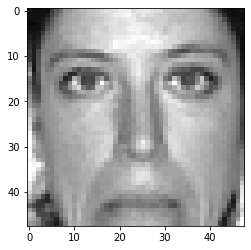

In [5]:
#  sample images
img= load_img('/content/test/disgust/PrivateTest_11895083.jpg')
img_arr = img_to_array(img)
plt.imshow(img)
img_arr.shape

(48, 48, 3)

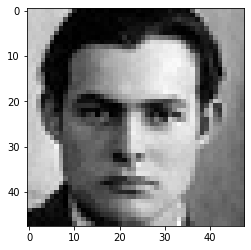

In [6]:
img= load_img('/content/train/neutral/Training_10059941.jpg')
img_arr = img_to_array(img)
plt.imshow(img)
img_arr.shape

<font color='red'>All images having shape = </font>(48 ,48 , 1) 

channel 1 due to grayscale image

In [7]:
target_size = (48 ,48)

setting up path to directories

In [8]:
train_path = '/content/train'
test_path = '/content/test'

available emotions are

In [9]:
emotion_labels = sorted(os.listdir(train_path))
print(emotion_labels)


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
in test datset ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


setting emotion dictionary for prediction purpoes

In [11]:
emotion_dic = {i : j for i,j in enumerate(emotion_labels) }e
motion_dic

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

preprocessing images with scaling using  ImageDataGenerator
for


1.   Train 
2.  Validation




In [12]:
train_datagen = ImageDataGenerator(

        rescale= 1/255)


validation_datagen = ImageDataGenerator(rescale=1/255)

In [13]:
train_generator = train_datagen.flow_from_directory( train_path,
        target_size=target_size,
        batch_size=32,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)
print("train datset has sample:",train_generator.samples)

print("train datset has catagories:",train_generator.class_indices)
print("train datset img shape :",train_generator.image_shape)


validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(test_path,
                                                              class_mode='categorical',
                                                              target_size=target_size,
                                                           batch_size=32,
                                                             color_mode="grayscale")
                                                            
print("test datset has sample:",validation_generator.samples)

print("test datset has catagories:",validation_generator.class_indices)
print("test datset img shape :",validation_generator.image_shape)



Found 28709 images belonging to 7 classes.
train datset has sample: 28709
train datset has catagories: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
train datset img shape : (48, 48, 1)
Found 7178 images belonging to 7 classes.
test datset has sample: 7178
test datset has catagories: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
test datset img shape : (48, 48, 1)


generating sample image from generator 

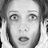

In [14]:
array_to_img(validation_generator[0][0][0])

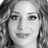

In [15]:
array_to_img(train_generator[0][0][5])

Defining model with different layers of 
 

*  Conv2D for feature extraction
*   BatchNormalization for normalize input
*   MaxPooling2D for pool only requred features
*   Dropout for overcome overfitting
*   Flatten for flatten the matrix image input to vectorised form
*   Dense to create artificial neural network









In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=train_generator.image_shape),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),

   


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
 
 
 
    tf.keras.layers.Dense(len(emotion_dic), activation='softmax')
])


model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 128)       5

compiling model with categorical_crossentropy as model has multiple catagories to classify

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

fitting model with train and validation data with 100 epochs

In [33]:
model_fit = model.fit(train_generator,validation_data=validation_generator,epochs=100)

Epoch 1/100
898/898 [==============================] - 90s 63ms/step - loss: 2.0162 - accuracy: 0.2184 - val_loss: 1.8183 - val_accuracy: 0.2471
Epoch 2/100
898/898 [==============================] - 56s 62ms/step - loss: 1.8252 - accuracy: 0.2457 - val_loss: 1.7977 - val_accuracy: 0.2471
Epoch 3/100
898/898 [==============================] - 56s 62ms/step - loss: 1.8040 - accuracy: 0.2533 - val_loss: 1.7945 - val_accuracy: 0.2480
Epoch 4/100
898/898 [==============================] - 56s 62ms/step - loss: 1.7425 - accuracy: 0.2868 - val_loss: 1.8432 - val_accuracy: 0.2836
Epoch 5/100
898/898 [==============================] - 55s 62ms/step - loss: 1.6234 - accuracy: 0.3472 - val_loss: 1.7561 - val_accuracy: 0.2827
Epoch 6/100
898/898 [==============================] - 55s 62ms/step - loss: 1.5262 - accuracy: 0.3858 - val_loss: 1.4781 - val_accuracy: 0.4136
Epoch 7/100
898/898 [==============================] - 55s 62ms/step - loss: 1.4810 - accuracy: 0.4120 - val_loss: 1.5055 - val_ac

In [65]:
model.evaluate(validation_generator)

225/225 [==============================] - 5s 22ms/step - loss: 1.3498 - accuracy: 0.6562


[1.3498231172561646, 0.6561716198921204]

predict function

In [92]:
def pred(img):
  img= load_img(img ,color_mode="grayscale")
  img = img_to_array(img)
  img =np.array([img])
  print(img.shape)
  predict= model.predict(img)
  p= np.argmax(predict)
  return p



Songs for different moods

In [101]:
song_dictionary=[   #angry
                 ['I Hate You So Much Right Now by Kelis','The Way I Am by Eminem',
  'In The End by Linkin Park',
'We Are Never Ever Getting Back Together by Taylor Swift',
'Black Skinhead by Kanye West',
'So What by Pink',
'The Kill by 30 Seconds To Mars',
'Killing In The Name  by  Rage Against The Machine',
'Smells Like Teen Spirit by Nirvana',
'Break Stuff by Limp Bizkit'],
# disgust
[
 "who says by selena gomez",
 "cartoon by ncs",
 "mortal by ncs",
 "dildara by shahrukh khan",
 "faded by alan walker",
 "bad guy by billie ellish",
 "lean on by dj snake",
 "if i lose myself by alesso"
],
# fear
["diamond heart by alan walker",
 "thunder by Imagin dragons",
 "believer by Imagin dragons",
 "calling by fatrat",
 "nights by avicii",
 "sky full of stars by coldpaly",
 "fearless by ncs",
 "chariots of fire by vangelies"
 ],
#  happy
[
 'i am an albatraoz by aron',
 'tum se hi by jab we met',
 "all around the world by r3hab",
 " astronomia by tony igy",
 "wavin falg  by Knnan",
 "come on get your love by redbone",
 "counting star by one repulbic",
 "love me like you do by ellie goulding"
],
# neutral
["all falls down by alan walker",
 "summer by calvin harris",
 "dernier danse by indila",
 "play hard by david guetta",
 "paly date by melanie",
 "hossana by ek tha deewana",
 "memories by marron 5",
 "see you again by wiz khalifa"
 ],
# sad
["sing me to sleep by alan walker",
 "symphony by clean bandit",
 "hymm for weekend by coldplay",
 "good feeling by florida",
 "sun is never going down by martin garrix",
 "something just like this by chainsmoker",
 "hall of fame by scipts",
 "sun is shining by alesso",
 "cheap thrills by sia",
 "ekla chalo re by kishor kumar"],
# surprise
["one kiss by calvin harris",
 "baby by justin bieber",
 "open wide by calvin harris",
 "bad style by time back",
 "never really over by katy perry",
 "back to you by selena gomez",
 "took pill in lbiza by mike",
 "ride by twenty piolets",
 "its my life by bon jovi"]]


Generate sample image from any of the directory


In [117]:
def sample():
  main_dir=['/content/test','/content/train']
  r = random.randint(0,1)
  main_d=main_dir[r]
  print("Sample choosen from " , main_d[8:])
  lst = os.listdir(main_d)
  r = random.randint(0,len(lst)-1)
  dir = lst[r]
  label = dir
  dir = os.path.join(main_d , dir)
  lst1=os.listdir(dir)
  r = random.randint(0,len(lst1)-1)
  img = lst1[r]
  img= os.path.join( dir,img)
  print("Image choosen out of ",len(lst1), ' samples')  
  p=pred(img)
  prediction=emotion_dic[p]
  img=Image.open(img)
  plt.imshow(img , cmap='gray')
  plt.axis('off')
  plt.title(f"Actual :{label} , Predicted : {prediction}")
  plt.plot()
  
  song = song_dictionary[p]
  r =random.randint(0,len(song)-1)
  song = song[r]
  if label==prediction:
    print("You are looking ",emotion_dic[p],".Song Recommendations for you is :",song)
  else:
    print("seems like predicted wrong output!!")


Sample choosen from  /train
Image choosen out of  4830  samples
(1, 48, 48, 1)
seems like predicted wrong output!!


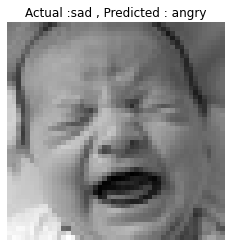

In [118]:
sample()

Sample choosen from  /train
Image choosen out of  4830  samples
(1, 48, 48, 1)
seems like predicted wrong output!!


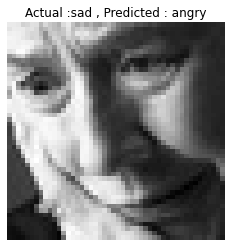

In [119]:
sample()

Sample choosen from  /train
Image choosen out of  4097  samples
(1, 48, 48, 1)
seems like predicted wrong output!!


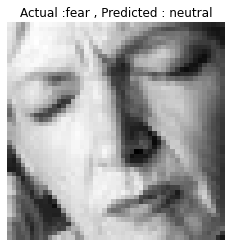

In [120]:
sample()

Sample choosen from  /test
Image choosen out of  1247  samples
(1, 48, 48, 1)
seems like predicted wrong output!!


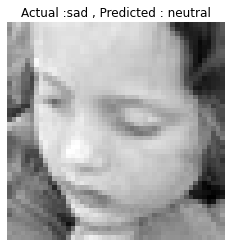

In [121]:
sample()

Sample choosen from  /test
Image choosen out of  831  samples
(1, 48, 48, 1)
seems like predicted wrong output!!


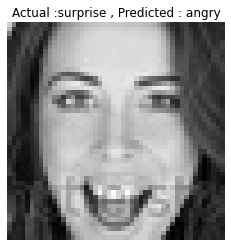

In [122]:
sample()

Sample choosen from  /test
Image choosen out of  1024  samples
(1, 48, 48, 1)
You are looking  fear .Song Recommendations for you is : fearless by ncs


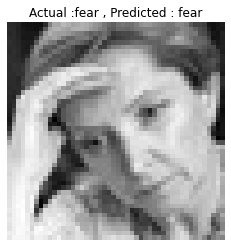

In [123]:
sample()

Sample choosen from  /train
Image choosen out of  3171  samples
(1, 48, 48, 1)
You are looking  surprise .Song Recommendations for you is : took pill in lbiza by mike


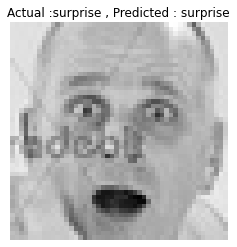

In [124]:
sample()

Sample choosen from  /test
Image choosen out of  1024  samples
(1, 48, 48, 1)
seems like predicted wrong output!!


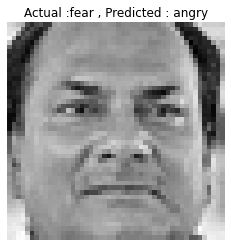

In [125]:
sample()

Sample choosen from  /test
Image choosen out of  1024  samples
(1, 48, 48, 1)
seems like predicted wrong output!!


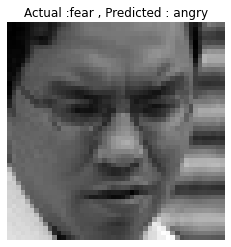

In [126]:
sample()

Sample choosen from  /test
Image choosen out of  831  samples
(1, 48, 48, 1)
You are looking  surprise .Song Recommendations for you is : its my life by bon jovi


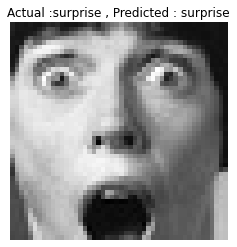

In [127]:
sample()